# Notebook for the visualizations of ambigous data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.data.sampling_strategy import ConstantAmplitudesSamplingStrategy, SamplingStrategy
from src.data.sampler import MeanSamplerConstant, AmplitudeSamplerConstant, NoiseSamplerNormal
from src.data.make_dataset import make_mixed_dataset
from src.visualization.visualize import InputOutputVisualization
from src.visualization.utils import TURQUOIS

sample_size = 10
sigmas = "2"
sequence_lengths="512"
sampling_strategy_class = ConstantAmplitudesSamplingStrategy
dataset_no_delay = make_mixed_dataset(sample_size=sample_size,
                             sampling_strategy_class=sampling_strategy_class,
                             frequencies=[1/32,],
                             delays=[0],
                             sigmas=[2],
                             sample_sequence_lengths=[512]
                             )

2021-11-08 14:50:27 Mischa-PC numexpr.utils[2184] INFO NumExpr defaulting to 8 threads.


## Define sampling strategy s.t. the output data is ambigous

In [2]:
class MockSamplingStrategy(SamplingStrategy):
    def __init__(self, sequence_length, sigma):
        super().__init__(
            mean_sampler=MeanSamplerConstant(mean_value=72),
            amplitude_sampler=AmplitudeSamplerConstant([60, 60, 10]),
            noise_sampler=NoiseSamplerNormal(sigma, sequence_length),
        )

    def __str__(self):
        return f"Constant amplitude - Constant mean sampler, noise is i.i.d"

    def get_descriptor(self) -> str:
        return "constant amplitudes"

# Use newly defined sampling strategy to create new dataset

In [3]:
dataset_delay = make_mixed_dataset(sample_size=sample_size,
                             sampling_strategy_class=MockSamplingStrategy,
                             frequencies=[1/32,],
                             delays=[64],
                             sigmas=[2],
                             sample_sequence_lengths=[512]
                             )

dataset_delay.normalize()
dataset_no_delay.normalize()

2021-11-08 14:50:28 Mischa-PC src.data[2184] INFO Initializing and fitting new scaler to dataset
2021-11-08 14:50:28 Mischa-PC src.data[2184] INFO Initializing and fitting new scaler to dataset


In [4]:
import matplotlib.pyplot as plt
x_nodelay, y_nodelay, _ = dataset_no_delay[0]
x_delay, y_delay, _ = dataset_delay[0]
ts_nodelay = np.concatenate((x_nodelay, y_nodelay), axis=0).reshape(-1)
ts_delay = np.concatenate((x_delay, y_delay), axis=0).reshape(-1)
ts = [ts_nodelay, ts_delay]


# Visualize Input and Output to show that the same input can lead to different ground truth outptus

2021-11-08 14:50:46 Mischa-PC src.visualization[2184] INFO using latex font


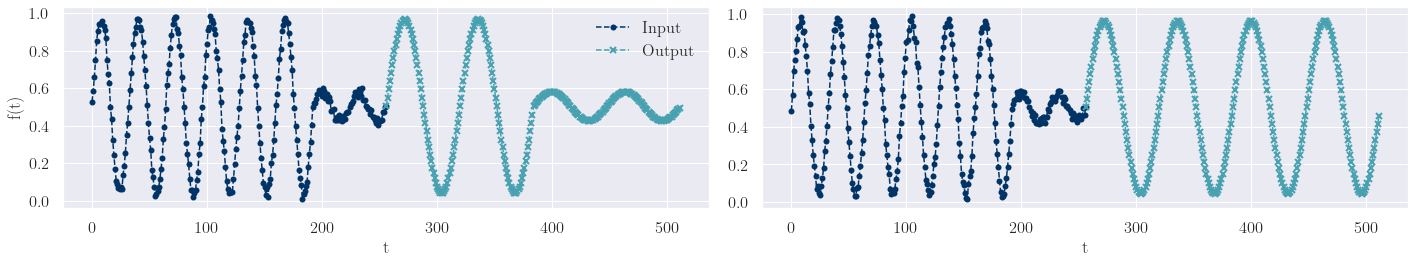

In [6]:
viz = InputOutputVisualization(use_latex_font=True, font_scale=1.5)
fig, axs = viz.subplots(1, 2, figsize=(20, 4))
viz.plot(ts, pred_starts=[256, 256])
axs[0,0].legend()
viz.get_ax(0).set_ylabel("f(t)")
viz.get_ax(0).set_xlabel("t")
viz.get_ax(1).set_xlabel("t")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).title = "Model"
plt.tight_layout()
plt.savefig("figures/ambigous_data.pdf")
plt.show()